<a href="https://colab.research.google.com/github/brunobhjs/Processos-Estoc-sticos---Eng-Telecom/blob/main/Umjogodedadosbhjs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random



Os três dados têm 6 faces e a probabilidade de cada face parar virada para cima é a mesma para todas. Para isso foi utilizada uma matriz que comporta todas as possíveis combinações de faces abrangendo todo o espaço amostral.

In [ ]:
nfaces = 6

nresultados = nfaces*nfaces*nfaces

resultados = np.zeros((nresultados,3))

for i in range (1,nfaces+1):
  for j in range (1,nfaces+1):
    for k in range (1,nfaces+1):
      resultados [(i-1)*nfaces**2 + (j-1)*nfaces + (k-1), 0] = i 
      resultados [(i-1)*nfaces**2 + (j-1)*nfaces + (k-1), 1] = j
      resultados [(i-1)*nfaces**2 + (j-1)*nfaces + (k-1), 2] = k
print(resultados)

[[1. 1. 1.]
 [1. 1. 2.]
 [1. 1. 3.]
 [1. 1. 4.]
 [1. 1. 5.]
 [1. 1. 6.]
 [1. 2. 1.]
 [1. 2. 2.]
 [1. 2. 3.]
 [1. 2. 4.]
 [1. 2. 5.]
 [1. 2. 6.]
 [1. 3. 1.]
 [1. 3. 2.]
 [1. 3. 3.]
 [1. 3. 4.]
 [1. 3. 5.]
 [1. 3. 6.]
 [1. 4. 1.]
 [1. 4. 2.]
 [1. 4. 3.]
 [1. 4. 4.]
 [1. 4. 5.]
 [1. 4. 6.]
 [1. 5. 1.]
 [1. 5. 2.]
 [1. 5. 3.]
 [1. 5. 4.]
 [1. 5. 5.]
 [1. 5. 6.]
 [1. 6. 1.]
 [1. 6. 2.]
 [1. 6. 3.]
 [1. 6. 4.]
 [1. 6. 5.]
 [1. 6. 6.]
 [2. 1. 1.]
 [2. 1. 2.]
 [2. 1. 3.]
 [2. 1. 4.]
 [2. 1. 5.]
 [2. 1. 6.]
 [2. 2. 1.]
 [2. 2. 2.]
 [2. 2. 3.]
 [2. 2. 4.]
 [2. 2. 5.]
 [2. 2. 6.]
 [2. 3. 1.]
 [2. 3. 2.]
 [2. 3. 3.]
 [2. 3. 4.]
 [2. 3. 5.]
 [2. 3. 6.]
 [2. 4. 1.]
 [2. 4. 2.]
 [2. 4. 3.]
 [2. 4. 4.]
 [2. 4. 5.]
 [2. 4. 6.]
 [2. 5. 1.]
 [2. 5. 2.]
 [2. 5. 3.]
 [2. 5. 4.]
 [2. 5. 5.]
 [2. 5. 6.]
 [2. 6. 1.]
 [2. 6. 2.]
 [2. 6. 3.]
 [2. 6. 4.]
 [2. 6. 5.]
 [2. 6. 6.]
 [3. 1. 1.]
 [3. 1. 2.]
 [3. 1. 3.]
 [3. 1. 4.]
 [3. 1. 5.]
 [3. 1. 6.]
 [3. 2. 1.]
 [3. 2. 2.]
 [3. 2. 3.]
 [3. 2. 4.]
 [3. 2. 5.]
 [3.

Com o espaco amostral escolhido, pode-se observar que somando-se as faces em cada evento, alguns números aparecem com maior frequência e outros com menor.

In [ ]:
sumfaces = np.sum(resultados, axis=1, dtype=int)
print(sumfaces)

[ 3  4  5  6  7  8  4  5  6  7  8  9  5  6  7  8  9 10  6  7  8  9 10 11
  7  8  9 10 11 12  8  9 10 11 12 13  4  5  6  7  8  9  5  6  7  8  9 10
  6  7  8  9 10 11  7  8  9 10 11 12  8  9 10 11 12 13  9 10 11 12 13 14
  5  6  7  8  9 10  6  7  8  9 10 11  7  8  9 10 11 12  8  9 10 11 12 13
  9 10 11 12 13 14 10 11 12 13 14 15  6  7  8  9 10 11  7  8  9 10 11 12
  8  9 10 11 12 13  9 10 11 12 13 14 10 11 12 13 14 15 11 12 13 14 15 16
  7  8  9 10 11 12  8  9 10 11 12 13  9 10 11 12 13 14 10 11 12 13 14 15
 11 12 13 14 15 16 12 13 14 15 16 17  8  9 10 11 12 13  9 10 11 12 13 14
 10 11 12 13 14 15 11 12 13 14 15 16 12 13 14 15 16 17 13 14 15 16 17 18]


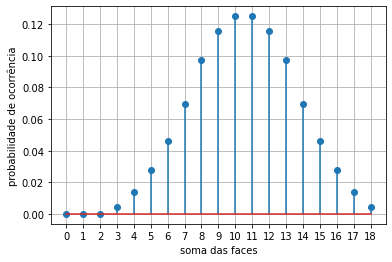

In [ ]:
probsumfaces = np.zeros(3*nfaces+1)
for i in range(len(sumfaces)):
  probsumfaces[sumfaces[i]] = probsumfaces[sumfaces[i]] + 1

probsumfaces = probsumfaces/ (nfaces**3)
plt.stem(range (len(probsumfaces)),probsumfaces, use_line_collection=True)
plt.xlabel('soma das faces')
plt.ylabel('probabilidade de ocorrência')
plt.xticks(range(len(probsumfaces)))
plt.grid('both')


Analisando as probabilidades dos eventos teóricos e simulados, percebe-seque os resultados são muito próximos do previsto.

In [ ]:
nexperimentos = 50000

simulacao = np.zeros(3*nfaces+1)
for i in range(nexperimentos):

  soma = 0
  for j in range(3):
    soma = soma + random.randint(1,nfaces)
  simulacao[soma] = simulacao[soma] +1
simulacao = simulacao/nexperimentos

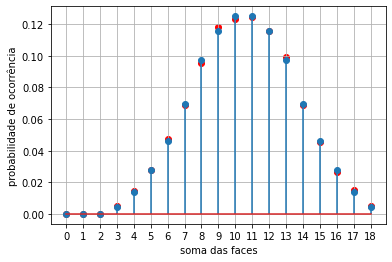

In [ ]:
plt.stem(range(len(probsumfaces)), probsumfaces, use_line_collection=True)
plt.scatter(range(len(probsumfaces)), simulacao, c='r')

plt.xlabel('soma das faces')
plt.ylabel('probabilidade de ocorrência')
plt.xticks(range(len(probsumfaces)))
plt.grid('both')